## Q1: Binary, Grayscale, and RGB Conversion

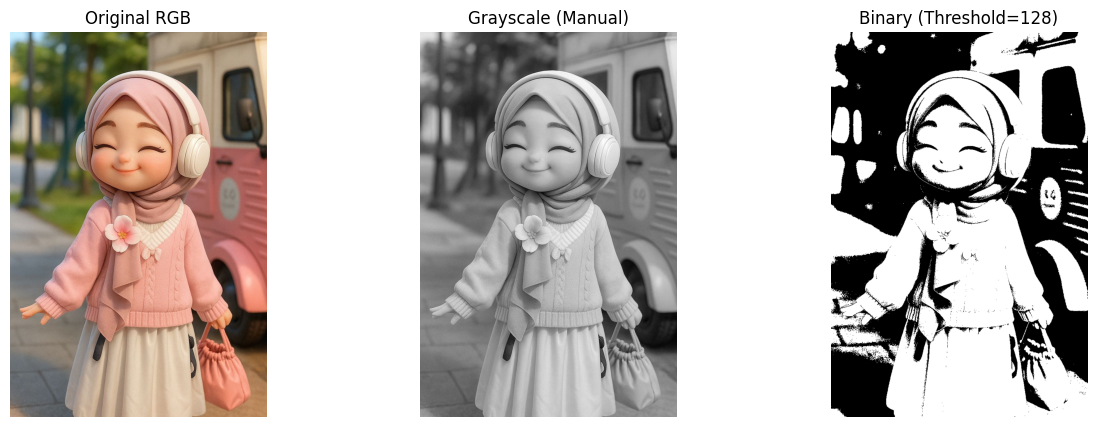

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('cv_img.jpg')  # OpenCV loads in BGR by default
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Extract R, G, B channels
R = rgb_image[:, :, 0]
G = rgb_image[:, :, 1]
B = rgb_image[:, :, 2]

# Manual grayscale conversion
gray_image = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# ===== Step 3: Convert to Binary (manual thresholding) =====

threshold_value = 128
binary_image = np.zeros_like(gray_image)
binary_image[gray_image > threshold_value] = 255  # White if above threshold, else black

# ===== Step 4: Display RGB, Grayscale, and Binary side by side =====
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(rgb_image)
ax[0].set_title("Original RGB")
ax[0].axis("off")

ax[1].imshow(gray_image, cmap='gray')
ax[1].set_title("Grayscale (Manual)")
ax[1].axis("off")

ax[2].imshow(binary_image, cmap='gray')
ax[2].set_title(f"Binary (Threshold={threshold_value})")
ax[2].axis("off")

plt.show()



<small>

### Effect of Using Different Thresholds

Thresholding converts a grayscale image into a binary image by turning each pixel either **black (0)** or **white (255)** based on a cut-off value (threshold).

For each pixel:
- If the pixel value is **greater than the threshold** → it becomes **white (255)**.
- Otherwise → it becomes **black (0)**.

Changing the threshold changes how many pixels turn white:

| Threshold | Effect | How the image looks |
|-----------|--------|---------------------|
| **Low** (e.g., 50) | Easier to become white | Most pixels are above 50, so the image turns mostly **white**. |
| **Medium** (e.g., 128) | Balanced | A good mix of black and white regions — normal details. |
| **High** (e.g., 200) | Harder to become white | Only very bright pixels are above 200, so the image turns mostly **black**. |

</small>


## Q2: Intensity Transformations

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_49892\2293978774.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(image.ravel(), 256, [0,256])


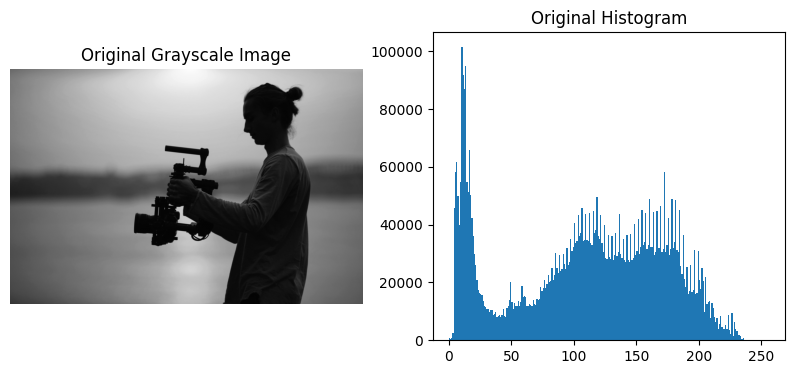

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_49892\2293978774.py:70: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(images[i].ravel(), 256, [0,256])


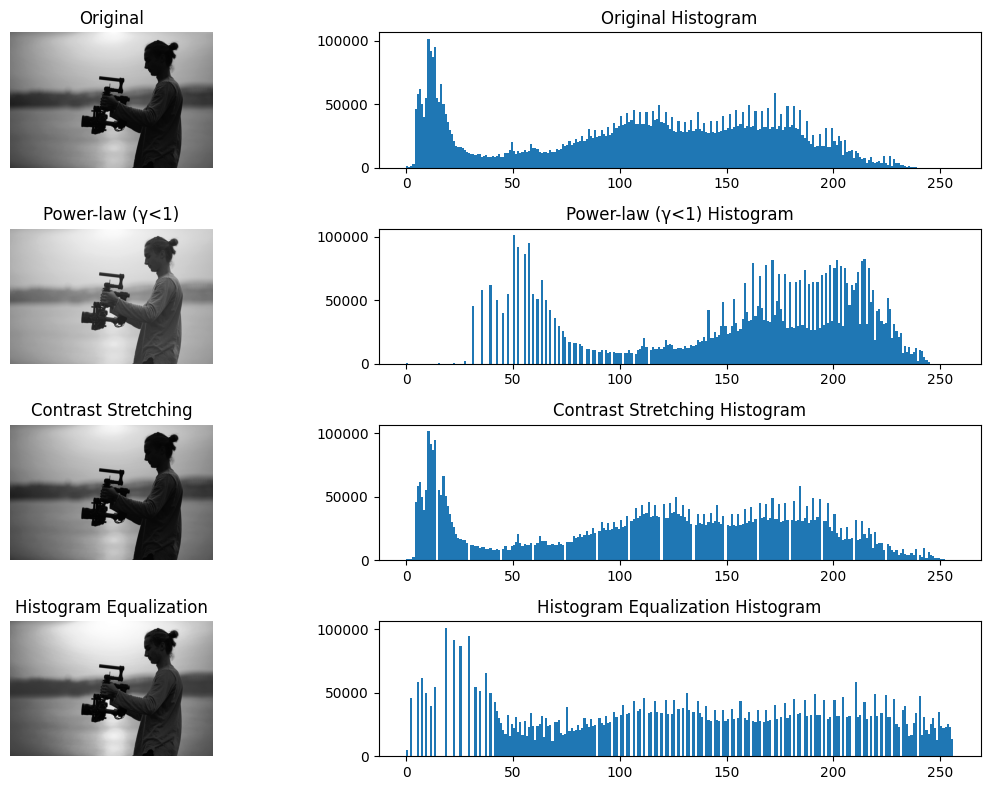

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load an image in grayscale
image = cv2.imread('camera.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image loaded
if image is None:
    raise FileNotFoundError("Image not found. Please check the path/name.")

# Show the original image and histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(image.ravel(), 256, [0,256])
plt.title('Original Histogram')
plt.show()

# ------------------------------------------------------------
# 1. Power-law (Gamma) Transformation
# ------------------------------------------------------------

gamma = 0.5  # < 1 to brighten dark pixels
c = 255.0 / (255.0 ** gamma)  # scaling factor so output stays in [0, 255]

# Apply power-law transformation
power_law = c * (image.astype(np.float32) ** gamma)
power_law = np.clip(power_law, 0, 255).astype(np.uint8)

# ------------------------------------------------------------
# 2. Contrast Stretching
# ------------------------------------------------------------

# Min-Max stretching: new_pixel = (pixel - min) * 255 / (max - min)
min_val = np.min(image)
max_val = np.max(image)

# To avoid division by zero:
if max_val == min_val:
    contrast_stretched = np.zeros_like(image)
else:
    contrast_stretched = ((image.astype(np.float32) - min_val) * 255.0 / (max_val - min_val))
    contrast_stretched = np.clip(contrast_stretched, 0, 255).astype(np.uint8)

# ------------------------------------------------------------
# 3. Histogram Equalization (using OpenCV)
# ------------------------------------------------------------

hist_eq = cv2.equalizeHist(image)

# ------------------------------------------------------------
# Display images and histograms
# ------------------------------------------------------------

titles = ['Original', 'Power-law (γ<1)', 'Contrast Stretching', 'Histogram Equalization']
images = [image, power_law, contrast_stretched, hist_eq]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(4,2,2*i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

    plt.subplot(4,2,2*i+2)
    plt.hist(images[i].ravel(), 256, [0,256])
    plt.title(f'{titles[i]} Histogram')

plt.tight_layout()
plt.show()


<small>

#### Q: Intensity Transformations (Theory)

1. **If γ < 1 in power-law transformation**  
   - Dark pixels become **brighter**.  
   - Reason: The curve boosts lower intensity values more, so dark areas lighten up.

2. **Contrast Stretching vs Histogram Equalization**  
   - Both improve contrast, but they work differently:  
     - **Contrast Stretching** → Stretches pixel values linearly between min and max.  
     - **Histogram Equalization** → Redistributes pixel values non-linearly so brightness levels are more evenly used, enhancing details.

</small>


## Q3: Edge Detection using Gradient (Finite Difference)

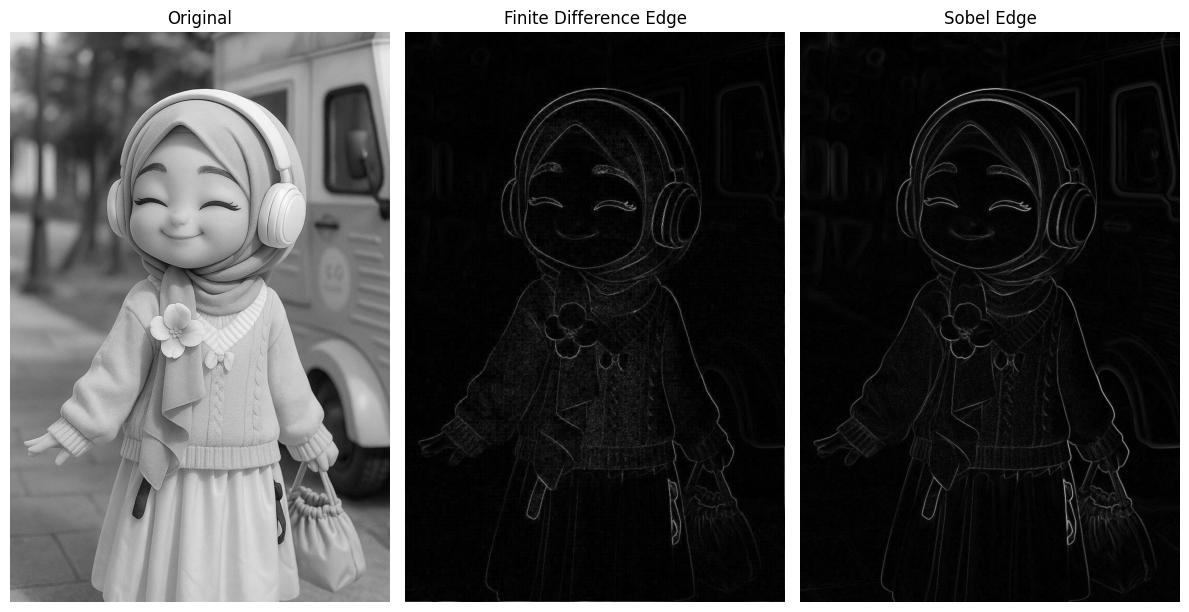

In [11]:
# Q3: Edge Detection using Gradient (Finite Difference)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a grayscale image
image = cv2.imread('cv_img.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute finite differences (Gx, Gy)
# Shift image by 1 pixel in x and y directions
# Use np.roll for simplicity
Gx = np.roll(image, -1, axis=1).astype(np.float32) - image.astype(np.float32)
Gy = np.roll(image, -1, axis=0).astype(np.float32) - image.astype(np.float32)

# Step 3: Gradient magnitude
grad_mag = np.sqrt(Gx**2 + Gy**2)

# Normalize to 0–255 for display
grad_mag_norm = (grad_mag / grad_mag.max()) * 255
grad_mag_norm = grad_mag_norm.astype(np.uint8)

# Step 4: Sobel edge detection (OpenCV)
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = np.sqrt(sobelx**2 + sobely**2)
sobel_mag_norm = (sobel_mag / sobel_mag.max()) * 255
sobel_mag_norm = sobel_mag_norm.astype(np.uint8)

# Display results
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(grad_mag_norm, cmap='gray')
plt.title('Finite Difference Edge')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sobel_mag_norm, cmap='gray')
plt.title('Sobel Edge')
plt.axis('off')

plt.tight_layout()
plt.show()


<small>

#### Q3: Edge Detection (Theory)

4. **Noise & False Edges**  
   - Noise causes sudden brightness changes → gradient thinks it's an edge → false edges appear.

5. **Which Localizes Better?**  
   - Sobel localizes edges better than simple finite difference because it smooths + detects edges → less noise-sensitive.

6. **Compare with OpenCV Sobel**  
   - OpenCV's Sobel is optimized, smoother, handles borders properly → cleaner edge maps than manual implementations.

</small>


## Q4: Denoising using Mean and Gaussian Smoothing

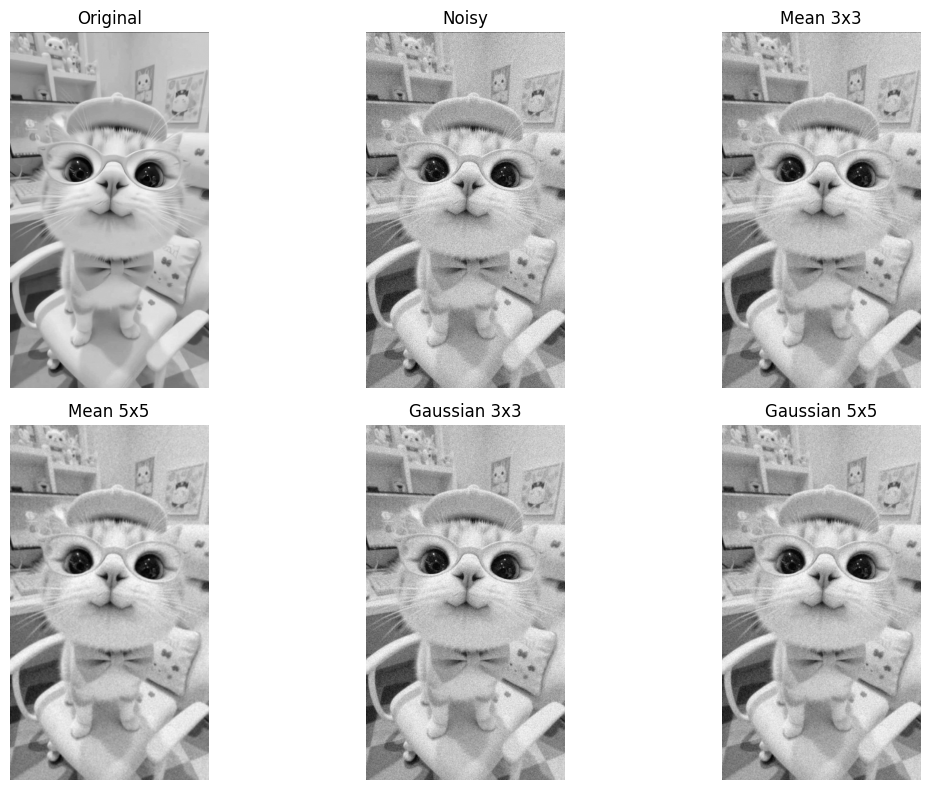

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cutecat.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Add Gaussian noise (mean=0, var=0.01)
# Convert to float in [0,1] first
noisy = image.astype(np.float32) / 255.0
mean = 0
var = 0.01
sigma = var ** 0.5
gaussian_noise = np.random.normal(mean, sigma, noisy.shape)
noisy_image = noisy + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 1)  # keep in [0,1]
noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)

# Step 3: Apply Mean filters (3x3, 5x5)
mean_3x3 = cv2.blur(noisy_image_uint8, (3,3))
mean_5x5 = cv2.blur(noisy_image_uint8, (5,5))

# Step 4: Apply Gaussian filters (3x3, 5x5, sigma=1.0)
gaussian_3x3 = cv2.GaussianBlur(noisy_image_uint8, (3,3), 1.0)
gaussian_5x5 = cv2.GaussianBlur(noisy_image_uint8, (5,5), 1.0)

# Show results
titles = [
    'Original', 'Noisy',
    'Mean 3x3', 'Mean 5x5',
    'Gaussian 3x3', 'Gaussian 5x5'
]
images = [
    image, noisy_image_uint8,
    mean_3x3, mean_5x5,
    gaussian_3x3, gaussian_5x5
]

plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


### Q4: Denoising — Theory Answers

- **Which filter is better and why?**  
  Gaussian is usually better.  
  It smooths noise but keeps edges clearer compared to the simple mean filter.

- **Why larger filter removes more noise but blurs edges more?**  
  Big filter averages over more pixels → noise goes away, but sharp details (edges) also get averaged → blurry edges.

- **Why Gaussian preserves edges better than mean?**  
  Gaussian gives more weight to nearby pixels (center pixels matter more).  
  Mean gives equal weight to all → edges get averaged away more.

- **When mean filtering is preferable?**  
  When you just need quick, simple smoothing and blur quality doesn’t matter (e.g., downsampling, some preprocessing steps).

- **Why Sobel uses larger weights for center pixels?**  
  To make the filter more sensitive to real edges in the center, while still considering neighbors (smoother + stronger edge detection).


## Q5: Edge Detection using Sobel Operator

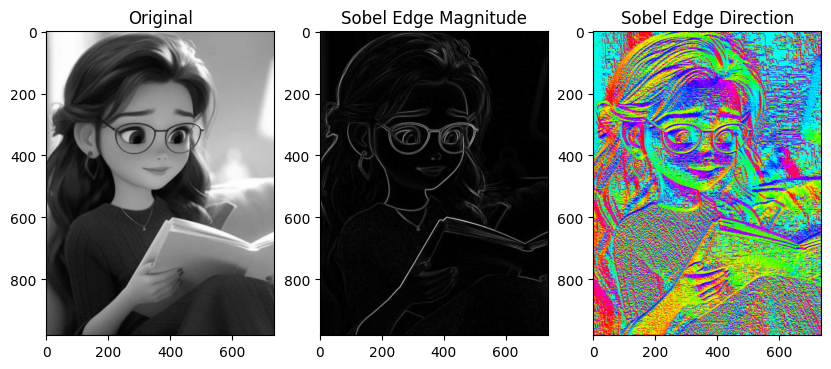

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('girl.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Define Sobel kernels
Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]], dtype=np.float32)

Ky = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]], dtype=np.float32)

# Step 3: Apply convolution (manual Sobel)
Gx = cv2.filter2D(image, cv2.CV_32F, Kx)
Gy = cv2.filter2D(image, cv2.CV_32F, Ky)

# Step 4: Compute magnitude and direction
magnitude = np.sqrt(Gx**2 + Gy**2)
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
magnitude = magnitude.astype(np.uint8)

direction = np.arctan2(Gy, Gx)  # in radians, optional

# Step 5: Show results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray'); plt.title('Original')
plt.subplot(1,3,2); plt.imshow(magnitude, cmap='gray'); plt.title('Sobel Edge Magnitude')
plt.subplot(1,3,3); plt.imshow(direction, cmap='hsv'); plt.title('Sobel Edge Direction')
plt.show()


<small>

### Sobel Edge Detection — Summary

- **Sobel** uses special kernels with center weights → smooth + accurate edges.  
- **Finite Difference**: simple subtraction, more noise-sensitive.  

| Feature         | Finite Difference        | Sobel Operator          |
|-----------------|--------------------------|-------------------------|
| Noise Handling  | Poor (many false edges)  | Better (less noise)     |
| Edge Clarity    | Basic edges              | Sharper edges           |
| Direction Info  | Can compute, but noisy   | More stable             |
| Usage           | Rare in practice         | Very common in practice |

**Conclusion:**  
Sobel is better for most edge-detection tasks because it balances **edge sensitivity** with **noise reduction**.

</small>


## Q6 (Bonus): Canny Edge Detector

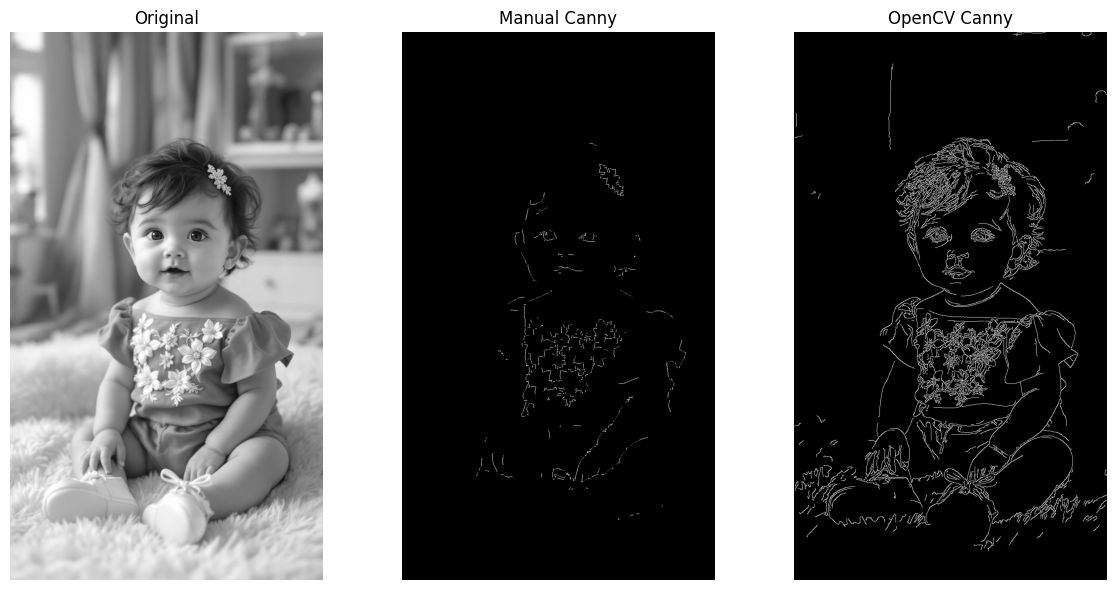

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('babygirl.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Gaussian smoothing
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# 2. Gradient magnitude and direction (using Sobel)
Gx = cv2.Sobel(np.float32(blurred), cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(np.float32(blurred), cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(Gx**2 + Gy**2)
direction = np.arctan2(Gy, Gx)

# Normalize magnitude to 0–255
magnitude = (magnitude / magnitude.max()) * 255
magnitude = magnitude.astype(np.uint8)

# 3. Non-maximum suppression
def non_max_suppression(mag, dir):
    M, N = mag.shape
    Z = np.zeros((M,N), dtype=np.uint8)
    angle = dir * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255

            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = mag[i, j+1]
                r = mag[i, j-1]
            elif (22.5 <= angle[i,j] < 67.5):
                q = mag[i+1, j-1]
                r = mag[i-1, j+1]
            elif (67.5 <= angle[i,j] < 112.5):
                q = mag[i+1, j]
                r = mag[i-1, j]
            elif (112.5 <= angle[i,j] < 157.5):
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]

            if (mag[i,j] >= q) and (mag[i,j] >= r):
                Z[i,j] = mag[i,j]
            else:
                Z[i,j] = 0

    return Z

nms = non_max_suppression(magnitude, direction)

# 4. Double thresholding and hysteresis
low_thresh = 50
high_thresh = 100

strong = 255
weak = 75

res = np.zeros_like(nms)
strong_i, strong_j = np.where(nms >= high_thresh)
weak_i, weak_j = np.where((nms >= low_thresh) & (nms < high_thresh))

res[strong_i, strong_j] = strong
res[weak_i, weak_j] = weak

# Hysteresis
M, N = res.shape
for i in range(1, M-1):
    for j in range(1, N-1):
        if res[i,j] == weak:
            if ((res[i+1, j-1] == strong) or (res[i+1, j] == strong) or (res[i+1, j+1] == strong)
                or (res[i, j-1] == strong) or (res[i, j+1] == strong)
                or (res[i-1, j-1] == strong) or (res[i-1, j] == strong) or (res[i-1, j+1] == strong)):
                res[i,j] = strong
            else:
                res[i,j] = 0

manual_canny = res

# Compare with OpenCV Canny
opencv_canny = cv2.Canny(image, 50, 100)


plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(manual_canny, cmap='gray')
plt.title("Manual Canny")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(opencv_canny, cmap='gray')
plt.title("OpenCV Canny")
plt.axis('off')

plt.tight_layout()
plt.show()


<small>

### Canny Edge Detector — Key Answers

1. **Two thresholds**:  
   - High threshold → definite edges.  
   - Low threshold → possible edges, kept only if linked to strong edges.  
   - This reduces noise and false edges.

2. **Non-maximum suppression**:  
   - Removes pixels that are not the strongest in their direction.  
   - Thins edges without deleting them entirely.

3. **Hysteresis**:  
   - Links weak edges to strong ones if connected.  
   - Keeps real edges continuous, removes isolated noise.

</small>
